In [17]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
cwd = os.getcwd()
files_no_coupling = [os.path.join(cwd, os.path.join('../data/data_no_coupling/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_no_coupling/'))]
files_triple_phase = [os.path.join(cwd, os.path.join('../data/data_triple_tangent_700/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_triple_tangent_700/'))]
files_shift = [os.path.join(cwd, os.path.join('../data/data_shift_700/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_shift_700/'))]

In [19]:
print(files_no_coupling)

['/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240413-235321-84af1b00.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-022332-3f5b1f33.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-091508-c8304cbc.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-060343-773c82fe.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-114559-4da97ee6.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240413-201126-4f298711.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-042113-2fcb887e.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_couplin

In [20]:
# return num_neurons, average deviation from ground truth,
# integrated sum of RMSE
def return_error_vals(filename, coupling_check=False,timesteps=30000):
    data = np.load(filename)
    n_neurons = data['pi_n_neurons']
    if coupling_check: coupling = data['coupling_method'].item()
    else: coupling=None
    path = data['path'][0:timesteps]
    est = data['sim_path'][0:timesteps]
    dist = np.sqrt(np.sum((path - est)**2,axis=1))
    avg_dist = np.mean(dist)
    total_error = 0

    for i in range(1, dist.shape[0]):
        total_error = total_error + 0.001/2 * (dist[i-1]+ dist[i])


    return n_neurons.item(), coupling, avg_dist, total_error

In [21]:
return_error_vals(files_no_coupling[0])

(500, None, 0.057381620165173716, 1.7208961033326078)

In [22]:
avgs = {}
totals = {}

In [23]:
for f in files_no_coupling:
    print(f)
    n, _, dist, total = return_error_vals(f)

    if n not in avgs.keys():
        avgs[n] = [dist]
    else:
        avgs[n].append(dist)

    if n not in totals.keys():
        totals[n] = [total]
    else:
        totals[n].append(total)

/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240413-235321-84af1b00.npz
/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-022332-3f5b1f33.npz
/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-091508-c8304cbc.npz
/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-060343-773c82fe.npz
/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-114559-4da97ee6.npz
/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240413-201126-4f298711.npz
/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-042113-2fcb887e.npz
/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240

In [24]:
num_neurons = [300, 500, 700, 900]
nn_averages = []
nn_avgs_error = []
nn_totals = []
nn_totals_error = []

for n in num_neurons:
    nn_averages.append(np.mean(avgs[n]))
    nn_avgs_error.append(np.std(avgs[n]))
    nn_totals.append(np.mean(totals[n]))
    nn_totals_error.append(np.std(totals[n]))

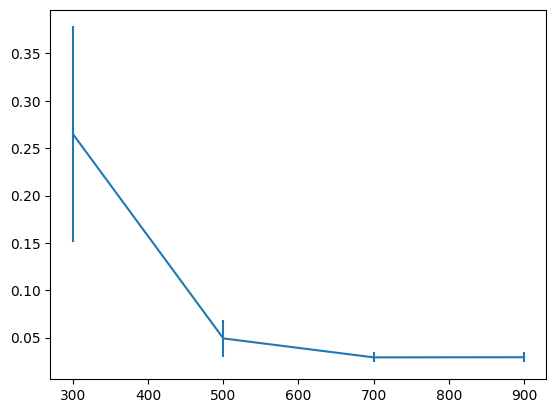

In [25]:
plt.errorbar(num_neurons, nn_averages, nn_avgs_error)
plt.show()

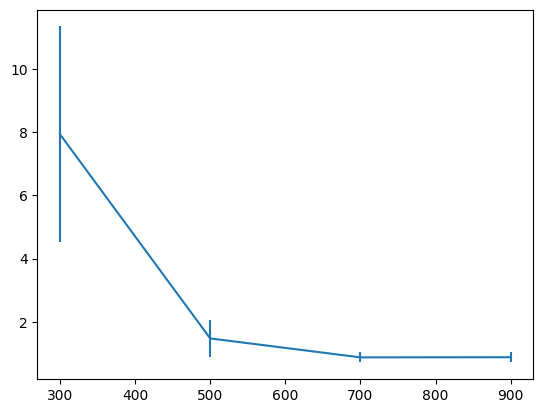

In [26]:
plt.errorbar(num_neurons, nn_totals, nn_totals_error)
plt.show()

In [27]:
avgs = {}
totals = {}

In [28]:
print(files_triple_phase)

['/home/alicia/Documents/School/syde-552-project/processing/../data/data_triple_tangent_700/IntegratorTrial#20240417-085113-dcb2a770.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_triple_tangent_700/IntegratorTrial#20240417-022644-7e05722e.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_triple_tangent_700/IntegratorTrial#20240417-032545-276ba341.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_triple_tangent_700/IntegratorTrial#20240417-021005-f285bc93.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_triple_tangent_700/IntegratorTrial#20240417-100552-5da79f63.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_triple_tangent_700/IntegratorTrial#20240417-030722-bcb15370.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_triple_tangent_700/IntegratorTrial#20240417-061650-3d12bbca.npz', '/home/alicia/Documents/School/sy

In [29]:
for f in files_triple_phase:
    n, c, dist, total = return_error_vals(f, coupling_check=True)

    if c == 'get_path_integrator_shift':
        pass
    if c not in avgs.keys():
        avgs[c] = [dist]
    else:
        avgs[c].append(dist)

    if c not in totals.keys():
        totals[c] = [total]
    else:
        totals[c].append(total)

In [30]:
for f in files_shift:
    n, c, dist, total = return_error_vals(f, coupling_check=True)

    if c not in avgs.keys():
        avgs[c] = [dist]
    else:
        avgs[c].append(dist)

    if c not in totals.keys():
        totals[c] = [total]
    else:
        totals[c].append(total)

In [31]:
print(avgs.keys())

dict_keys(['get_path_integrator_shift', 'get_path_integrator_phase', 'get_path_integrator_triple'])


In [32]:
order = ['get_path_integrator_phase', 'get_path_integrator_triple', 'get_path_integrator_shift']

In [33]:
coupling_avgs = []
coupling_avgs_error = []
coupling_totals_avgs = []
coupling_totals_error = []

for c in order:
    coupling_avgs.append(np.mean(avgs[c]))
    coupling_avgs_error.append(np.std(avgs[c]))
    coupling_totals_avgs.append(np.mean(totals[c]))
    coupling_totals_error.append(np.std(totals[c]))

In [34]:
x_labels = ['None',  'Tangent', 'Triples', 'Phase Shift']

avgs_data = [nn_averages[2]] + coupling_avgs
avgs_std = [nn_avgs_error[2]] + coupling_avgs_error
totals_data = [nn_totals[2]] + coupling_totals_avgs
totals_std = [nn_totals_error[2]] + coupling_totals_error

In [35]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

/tmp/ipykernel_97996/3065758079.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=14)


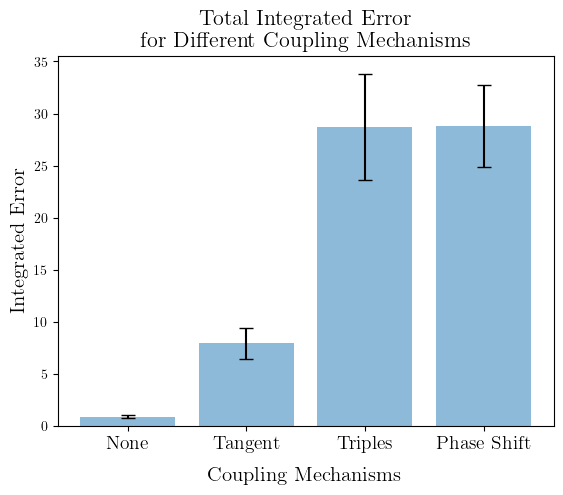

In [36]:
fig, ax = plt.subplots()

ax.bar(x_labels, totals_data, yerr=totals_std, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('Integrated Error', fontsize=15)
ax.set_xticklabels(x_labels, fontsize=14)
ax.set_xlabel('Coupling Mechanisms', fontsize=15, labelpad=10)
# ax.text(-0.05, 1.15, 'B.', transform=ax.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax.set_title('Total Integrated Error \n for Different Coupling Mechanisms', fontsize=16)

plt.show()

/tmp/ipykernel_97996/693582282.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(x_labels, fontsize=14)
/tmp/ipykernel_97996/693582282.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(x_labels, fontsize=14)


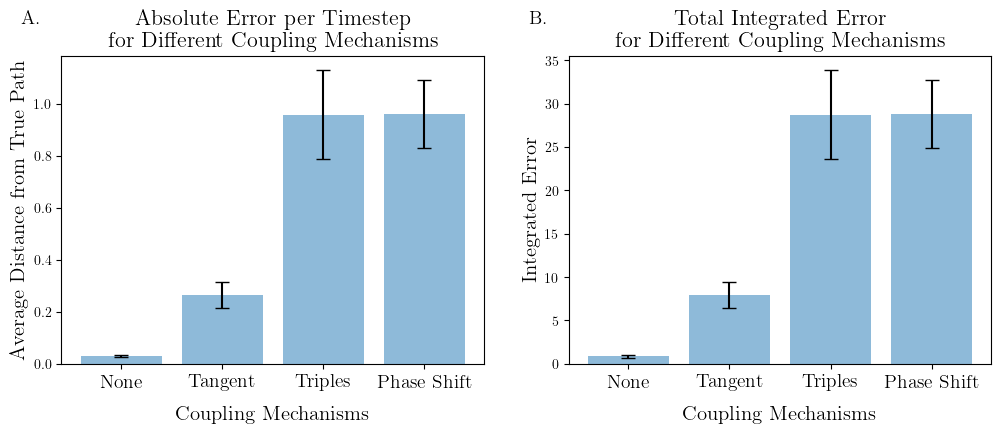

In [37]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].bar(x_labels, avgs_data, yerr=avgs_std, align='center', alpha=0.5, ecolor='black', capsize=5)
ax[0].set_ylabel('Average Distance from True Path', fontsize=15)
ax[0].set_xticklabels(x_labels, fontsize=14)
ax[0].set_xlabel('Coupling Mechanisms', fontsize=15, labelpad=10)
ax[0].text(-0.05, 1.15, 'A.', transform=ax[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax[0].set_title('Absolute Error per Timestep\nfor Different Coupling Mechanisms', fontsize=16)

ax[1].bar(x_labels, totals_data, yerr=totals_std, align='center', alpha=0.5, ecolor='black', capsize=5)
ax[1].set_ylabel('Integrated Error', fontsize=15)
ax[1].set_xticklabels(x_labels, fontsize=14)
ax[1].set_xlabel('Coupling Mechanisms', fontsize=15, labelpad=10)
ax[1].text(-0.05, 1.15, 'B.', transform=ax[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax[1].set_title('Total Integrated Error \n for Different Coupling Mechanisms', fontsize=16)

plt.show()

In [38]:
print(avgs_data)
print(avgs_std)

[0.029207646882680932, 0.2642860084645026, 0.9570018424862387, 0.9591828809904521]
[0.005275547390098308, 0.049544024952402115, 0.17046355841040414, 0.13159327493988143]
